In [20]:
# 20 Most Recent IM Races Analysis - 9/15/24
# IM New Zealand 2024 - IM Wisconsin 2024

# At this point I have extracted the data and have it in a CSV file.
# I will now read the data and start to analyze it.


In [21]:
# pip install requests beautifulsoup4 pandas


In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import radians, cos, sin, asin, sqrt
import json
import os
from pandas import DataFrame, Series

import numpy as np


In [38]:
# Load the data from the CSV file
im_data = pd.read_csv("20_recent_races_results_raw.csv")

# Display the first few rows of the DataFrame
im_data.head()


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
0,46,Michael Jackson,United States,Male,M50-54,99999,99999,99999,5209,832,99999,99999,99999,99999,DNF,Wisconsin,2024
1,630,Yann Gellot,United States,Male,M50-54,99999,99999,99999,5545,1015,32667,1288,99999,99999,DNF,Wisconsin,2024
2,81,Joana Roberts,United States,Female,F40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF,Wisconsin,2024
3,1166,Leo Buzalsky,United States,Male,M40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF,Wisconsin,2024
4,1206,Marnie Pearsall,United States,Female,F55-59,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS,Wisconsin,2024


In [39]:
# Check the data types of each column
im_data.dtypes


Bib               int64
Name             object
Country          object
Gender           object
Division         object
Division Rank     int64
Overall Time      int64
Overall Rank      int64
Swim Time         int64
Swim Rank         int64
Bike Time         int64
Bike Rank         int64
Run Time          int64
Run Rank          int64
Finish Status    object
Race Name        object
Year              int64
dtype: object

In [40]:
# Check for missing values in the DataFrame
im_data.isnull().sum()


Bib              0
Name             0
Country          0
Gender           0
Division         0
Division Rank    0
Overall Time     0
Overall Rank     0
Swim Time        0
Swim Rank        0
Bike Time        0
Bike Rank        0
Run Time         0
Run Rank         0
Finish Status    0
Race Name        0
Year             0
dtype: int64

In [41]:
# Check for duplicate rows in the DataFrame
im_data.duplicated().sum()


0

In [42]:
# Drop duplicate rows from the DataFrame
im_data.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
im_data.shape


(32646, 17)

In [43]:
# Check the unique values in the "Finish Status" column
im_data["Finish Status"].unique()


array(['DNF', 'DNS', 'NC', 'DQ', 'FIN'], dtype=object)

In [44]:
# Let's look at just people who finished the race.
# We can do this in 2 ways: the query method, or boolean indexing.

# Query method
# Assuming im_data is your DataFrame
filtered_df = im_data.query("`Finish Status` == 'FIN'")

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641,975,Wai Ming Leung,Hong Kong,Male,M55-59,49,60767,770,6571,711,30632,799,22439,676,FIN,New Zealand,2024
32642,1035,Mike Dagg,New Zealand,Male,M65-69,10,60798,771,7827,816,27920,738,23499,723,FIN,New Zealand,2024
32643,127,Craig Mccombe,Australia,Male,M50-54,99,60965,772,5076,422,29618,790,24674,762,FIN,New Zealand,2024
32644,251,Rachel Matthewson,New Zealand,Female,F50-54,19,61136,773,6213,667,28616,770,25151,768,FIN,New Zealand,2024


In [45]:
# Or can use boolean indexing

# Assuming im_data is your DataFrame
filtered_df = im_data[im_data['Finish Status'] == 'FIN']

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641,975,Wai Ming Leung,Hong Kong,Male,M55-59,49,60767,770,6571,711,30632,799,22439,676,FIN,New Zealand,2024
32642,1035,Mike Dagg,New Zealand,Male,M65-69,10,60798,771,7827,816,27920,738,23499,723,FIN,New Zealand,2024
32643,127,Craig Mccombe,Australia,Male,M50-54,99,60965,772,5076,422,29618,790,24674,762,FIN,New Zealand,2024
32644,251,Rachel Matthewson,New Zealand,Female,F50-54,19,61136,773,6213,667,28616,770,25151,768,FIN,New Zealand,2024


In [46]:
# What percentage of people finished their Ironman?

len(filtered_df) / len(im_data) * 100


87.707529253201

In [47]:
# # Convert 'time_in_seconds' to a timestamp (timedelta format)
# filtered_df['Overall Time'] = pd.to_timedelta(filtered_df['Overall Time'], unit='s')

# filtered_df.head()


### Maybe I don't want to do this. I want to keep the time in seconds for now.



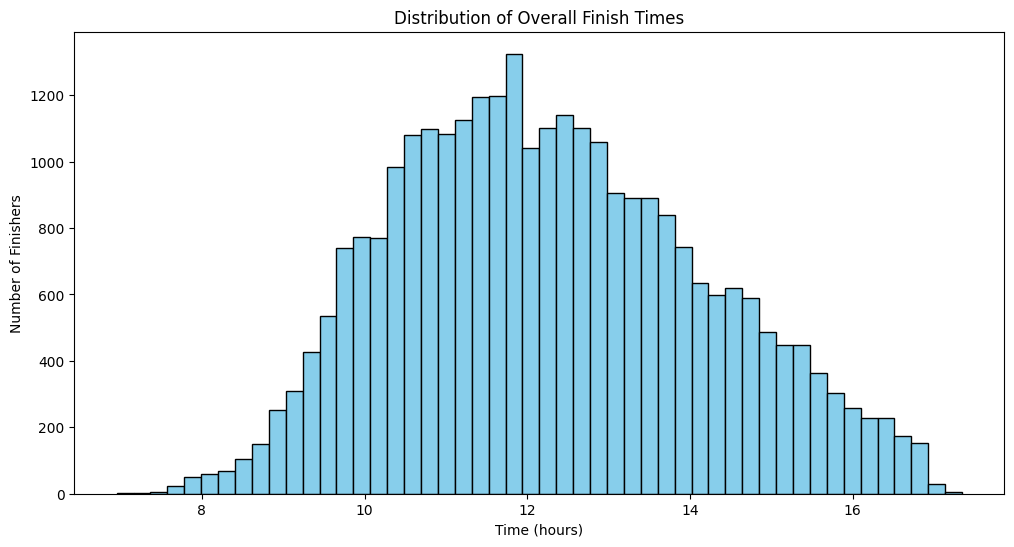

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024


In [49]:
# Let's look at the distribution of finish times for all
# finishers in the dataset.

# Plot a histogram of the overall finish times
plt.figure(figsize=(12, 6))
# plt.hist(filtered_df['Overall Time'].dt.total_seconds() / 3600, bins=50, color='skyblue', edgecolor='black')
plt.hist(filtered_df['Overall Time'] / 3600, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Finish Times')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Finishers')
plt.show()

# Display the DataFrame with the converted time format
filtered_df.head()


In [51]:
# We can assume the data is normally distributed, and calculate the mean and standard deviation.

# Calculate the mean and standard deviation of the finish times
mean_finish_time = filtered_df["Overall Time"].mean()
mean_finish_time = pd.to_timedelta(mean_finish_time, unit='s')

std_finish_time = filtered_df["Overall Time"].std()
std_finish_time = pd.to_timedelta(std_finish_time, unit='s')

mean_finish_time, std_finish_time



(Timedelta('0 days 12:17:01.685956763'),
 Timedelta('0 days 01:53:32.652477419'))

In [57]:
# Let me calculate the quantiles of the finish times.

# Calculate the quantiles
quantiles = filtered_df['Overall Time'].quantile([0.25, 0.5, 0.75])

quantiles_timedelta = pd.to_timedelta(quantiles, unit='s')
quantiles_timedelta


0.25   0 days 10:51:12
0.50   0 days 12:08:05
0.75   0 days 13:36:07
Name: Overall Time, dtype: timedelta64[ns]

In [60]:
# Let me calculate the average finish time for each race name.

# Calculate the average finish time
average_finish_time = filtered_df.groupby("Race Name")["Overall Time"].mean()
average_finish_time = pd.to_timedelta(average_finish_time, unit='s')

# Order the average finish times in ascending order
average_finish_time = average_finish_time.sort_values()

average_finish_time


Race Name
Frankfurt         0 days 11:24:25.991383220
Hamburg           0 days 11:25:47.711530219
Copenhagen        0 days 11:26:46.929084002
Vitoria-Gasteiz   0 days 11:36:54.431428571
Brazil            0 days 11:37:55.300159236
Canada            0 days 11:45:53.243770314
Cairns            0 days 12:02:00.937570942
Sweden            0 days 12:05:27.309890110
Austria           0 days 12:06:12.510775047
Tallinn           0 days 12:09:14.375176305
Switzerland       0 days 12:28:01.963594113
France            0 days 12:32:13.444915254
Australia         0 days 12:37:45.208469055
Lanzarote         0 days 12:46:08.040044494
South Africa      0 days 12:56:53.205882353
New Zealand       0 days 13:00:47.749354005
Texas             0 days 13:08:34.752622378
Philippines       0 days 13:30:23.888888889
Lake Placid       0 days 13:38:06.026848799
Wisconsin         0 days 13:45:57.495812395
Name: Overall Time, dtype: timedelta64[ns]